# 可視化

## 課題
以下に記載されている説明をpythonコードを逐次実行しながら読んでください。
### 基礎（Pythonコーディングに慣れていない人）
* 任意の異なる2つの関数を考え、それぞれ別の色と線種でplotを使って2次元で可視化してください。
* 先のグラフにタイトル、軸のラベル、凡例を追加して可視化してください。
* 先のグラフをscatterを使って分布図として可視化してください。その際、それぞれの関数は異なる色とマーカーを使用してください。
* 先のグラフの関数の出力にランダムノイズを加えたものを、エラーバーを使って可視化してください。
* 任意の曲面を表す関数を考え、3次元空間で可視化してください。その際、見やすいように角度を調整してください。
* seabornモジュールのfactorplot,FacetGrid,pairplot,PairGrid,jointplot,JointGridを用いて、"tips"データについて、レストランのチップの額と他の属性（支払額、性別、時間、曜日など）との関係を説明する複数の可視化を考えて実行してください。

http://seaborn.pydata.org/api.html

http://seaborn.pydata.org/examples/index.html
* Bokehを使って、任意の関数をインタラクティブに操作可能に可視化してください。

### 応用（Pythonコーディングに慣れている人）
* 空手クラブのネットワークデータについて、大規模グラフ解析で行った中心性（ノードの大きさ）やコミュニティ抽出（ノードやリンクの色）の分析の結果を反映して、D3.jsを用いてhtml上で可視化してください。

https://d3js.org/

* 前回までに用いた映画レビューデータやtweetデータ、または独自にスクレイピングしたデータから生成した多次元ベクトルを、PCA（またはSVD）、Isomap、t-SNE法を用いて次元圧縮して2次元に可視化してください。

### 線グラフ（関数）

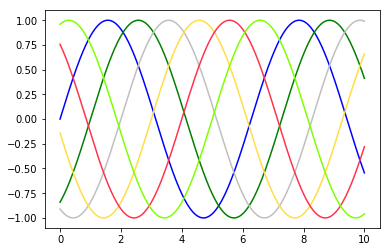

In [1]:
#インポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
%matplotlib inline

#入力データのベクトル
x = np.linspace(0, 10, 1000)

#色の指定
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported


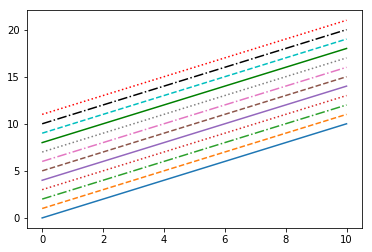

In [2]:
#線の指定
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

#色と線の指定
plt.plot(x, x + 8, '-g')  # solid green
plt.plot(x, x + 9, '--c') # dashed cyan
plt.plot(x, x + 10, '-.k') # dashdot black
plt.plot(x, x + 11, ':r');  # dotted red

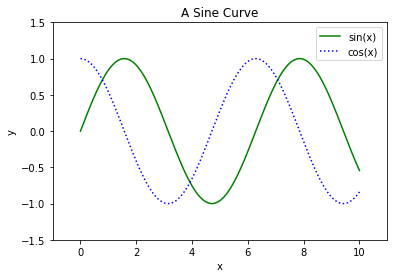

In [3]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

#plt.axis('equal')
#plt.axis([-1, 11, -1.5, 1.5]);

#x,y軸スケールの指定
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

#タイトルの指定
plt.title("A Sine Curve")

#x,y軸のラベル指定
plt.xlabel("x")
plt.ylabel("y")

#凡例の指定
plt.legend();

### 分布図

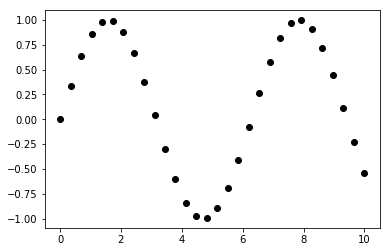

In [4]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

#プロットの種類の指定
plt.plot(x, y, 'o', color='black');

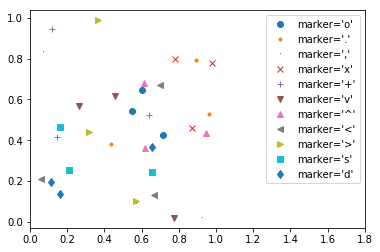

In [5]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(3), rng.rand(3), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

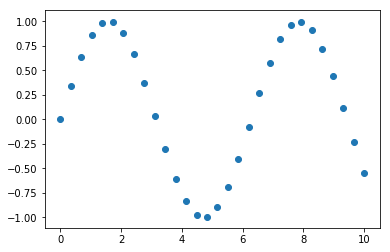

In [6]:
#scatterによる分布図
plt.scatter(x, y, marker='o');

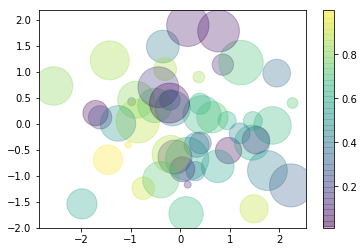

In [7]:
rng = np.random.RandomState(0)
x = rng.randn(50)
y = rng.randn(50)
colors = rng.rand(50)
sizes = 2000 * rng.rand(50)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### エラーバー

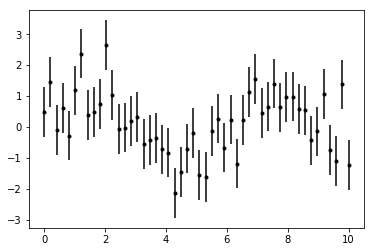

In [8]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

### 等高線（密度）図

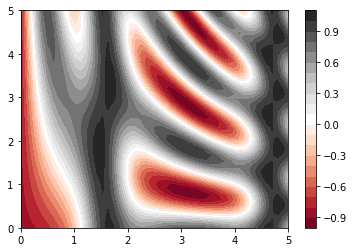

In [9]:
#曲面の定義
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

### 3次元図

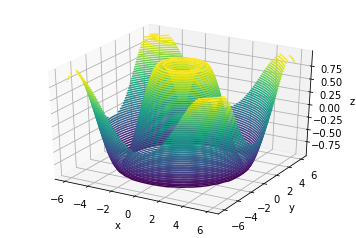

In [10]:
from mpl_toolkits import mplot3d

#曲面の定義
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

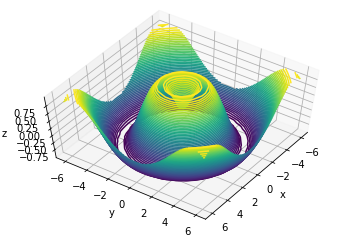

In [11]:
ax.view_init(60, 35)
fig

### ヒストグラム

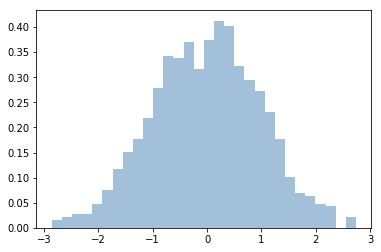

In [12]:
data = np.random.randn(1000)

plt.hist(data, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

### Seabornによる可視化
matplotlibベースの高次の可視化

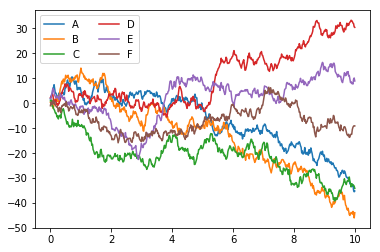

In [13]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

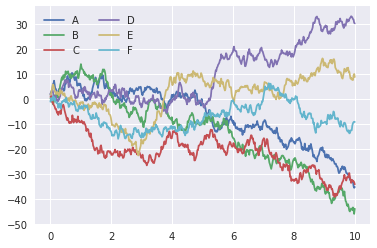

In [14]:
import seaborn as sns
sns.set()

# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

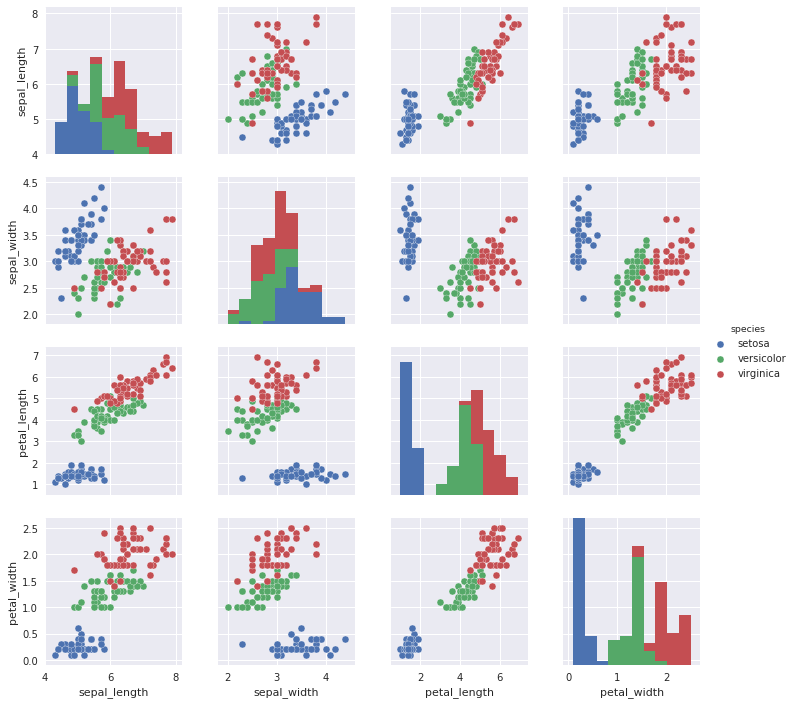

In [15]:
#irisデータセットの特徴量間の分布可視化例
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', size=2.5);

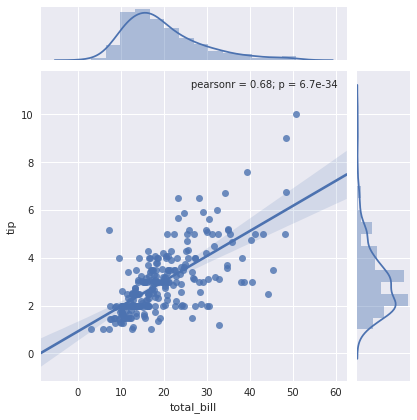

In [16]:
#tipsデータセットの特徴量間の回帰可視化例
tips = sns.load_dataset('tips')
#tips.head()
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

In [56]:
#tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
#grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
#grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [57]:
#with sns.axes_style(style='ticks'):
#    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
 #   g.set_axis_labels("Day", "Total Bill");

In [58]:
#with sns.axes_style('white'):
#    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

### Bokehのよる可視化
インタラクティブなグラフの可視化

In [17]:
import bokeh.plotting as bkh
bkh.output_notebook()

x = np.linspace(0., 1., 100)
y = np.cumsum(np.random.randn(100))

p = bkh.figure()
p.line(x=x, y=y)
bkh.show(p)

Loading BokehJS ...

### Javascript (D3.js)
Javascriptのよる可視化のhtmlへの埋め込み

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


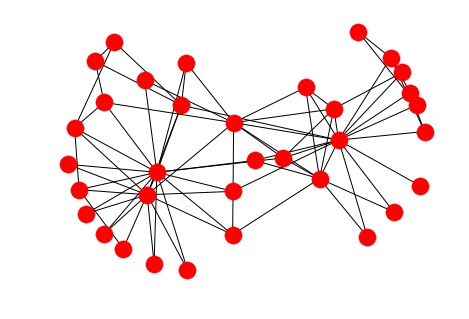

In [18]:
import json
import networkx as nx

g = nx.karate_club_graph()
plt.figure(figsize=(6,4));
nx.draw(g)

In [19]:
#空手クラブデータをjsonファイルへ出力
from networkx.readwrite import json_graph
data = json_graph.node_link_data(g)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [20]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [21]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 300,
        height = 300;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-example").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-example").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});

<IPython.core.display.Javascript object>

### 多次元データの可視化
手書き数字データ（8x8のピクセルデータ）の次元圧縮と可視化の例

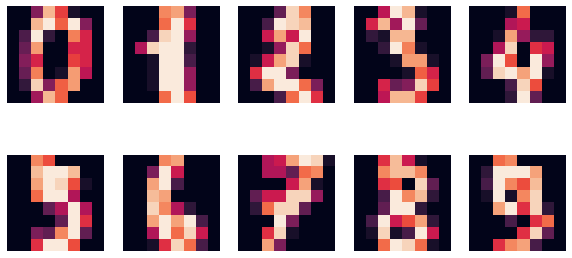

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

#### PCAによる次元圧縮と可視化

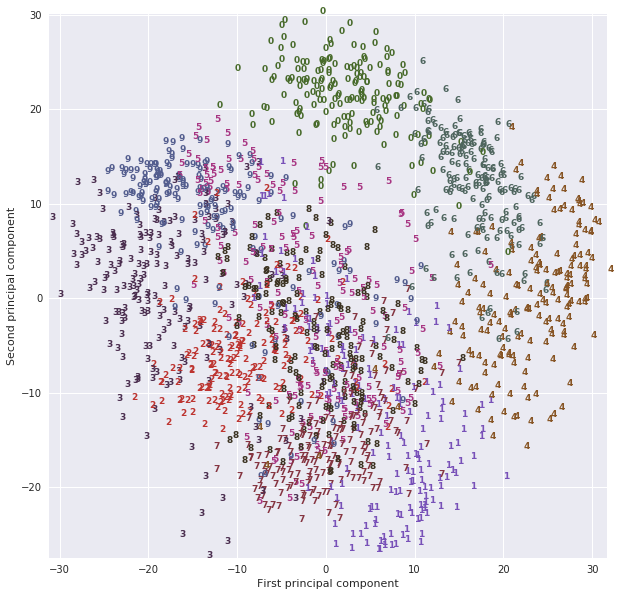

In [23]:
from sklearn.decomposition import PCA

# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#### Isomapによる次元圧縮と可視化

k近傍法によりオブジェクト間のグラフを生成。グラフ上でのオブジェクト間の最短経路に基づき低次元空間へ写像

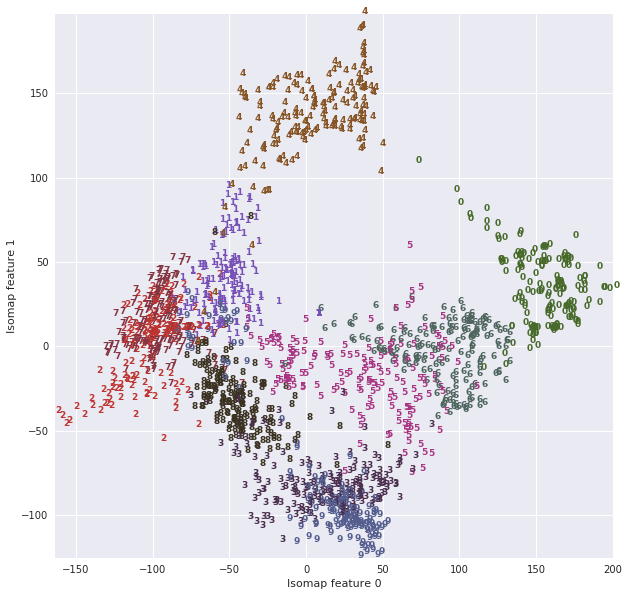

In [24]:
from sklearn.manifold import Isomap

# build a Isomap model
iso = Isomap(n_components=2)
digits_iso = iso.fit_transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_iso[:, 0].min(), digits_iso[:, 0].max())
plt.ylim(digits_iso[:, 1].min(), digits_iso[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_iso[i, 0], digits_iso[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Isomap feature 0")
plt.ylabel("Isomap feature 1")

#### t-SNEによる次元圧縮と可視化
オブジェクト間の距離をのユークリッドや類似度ではなく、条件付き確率として考える。圧縮前後の確率分布の情報量（KLダイバージェンス）が最小になるようにする。

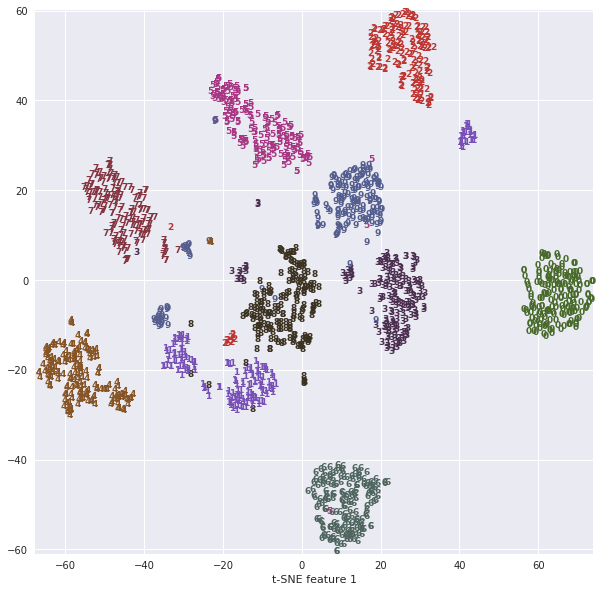

In [25]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")